# Metrics used to evaluate results of sensitivity tests

In this notebook, we try to implement and test metrics that will be used for the evaluation of how similar two curves are.

## Root mean square error (rmse)

The RMSE is defined as: $RMSE = \sqrt{\overline{(simul - obs)^2}}$.

In [2]:
import math
import numpy as np

In [5]:
actual = [1, 3, 6, 4, 2]
predicted = [2.6, 1.5, 3.9, 7, 4.1]

mse = np.square(np.subtract(actual, predicted)).mean()
rmse = math.sqrt(mse)

print(mse, rmse)

4.525999999999999 2.127439775880859


In [ ]:
# Adaptation to our problem: actual = array of lidar curve heights; predicted = array of simulation points corresponding to lidar curve heights.

## Standard error

The standard error is defined as: $\sigma^- = \frac{\sigma}{\sqrt{n}}$, where $n$ is the number of values in a series and $\sigma$ the series' standard deviation.

In [6]:
from scipy.stats import sem

In [7]:
data = [3, 4, 4, 5, 7, 8, 12, 14]

sem(data)

1.4197270864500682

In [ ]:
# Adaptation to our problem: data = array of [array of lidar curve heights - array of corresponding simulation points]

## Correlation

We use the Pearson correlation definition here: given a set of paired data $\{(x_1, y_1), ... , (x_n, y_n)\}$, the correlation coefficient is defined as:

$r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{ (\sum_{i=1}^n (x_i-\bar{x})^2)^{\frac{1}{2}} (\sum_{i=1}^n (y_i-\bar{y})^2)^{\frac{1}{2}} }$.

In [9]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats

In [19]:
dataframe = {
    "Array_1": [30, 70, 100, 130, 160, 190],
    "Array_2": [65.1, 49.5, 30.7, 10, -10, -29.6]
}

data = pd.DataFrame(dataframe)

print(data.corr())

overall_pearson_r = data.corr().iloc[0,1]
print(overall_pearson_r)

          Array_1   Array_2
Array_1  1.000000 -0.995655
Array_2 -0.995655  1.000000
-0.9956549581340367


In [20]:
r, p = stats.pearsonr(data.dropna()['Array_1'], data.dropna()['Array_2'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")

Scipy computed Pearson r: -0.9956549581340368 and p-value: 2.827806735805247e-05


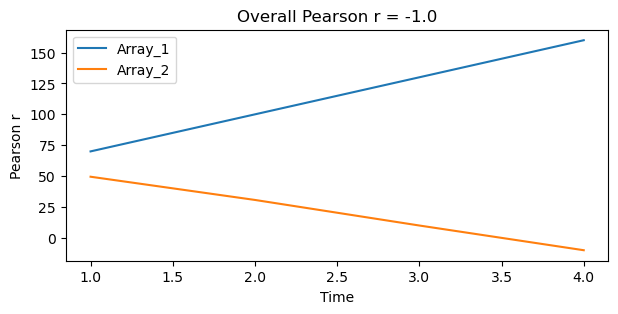

In [21]:
# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(7,3))
data.rolling(window=3,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

Text(0.5, 0.98, 'Smiling data and rolling window correlation')

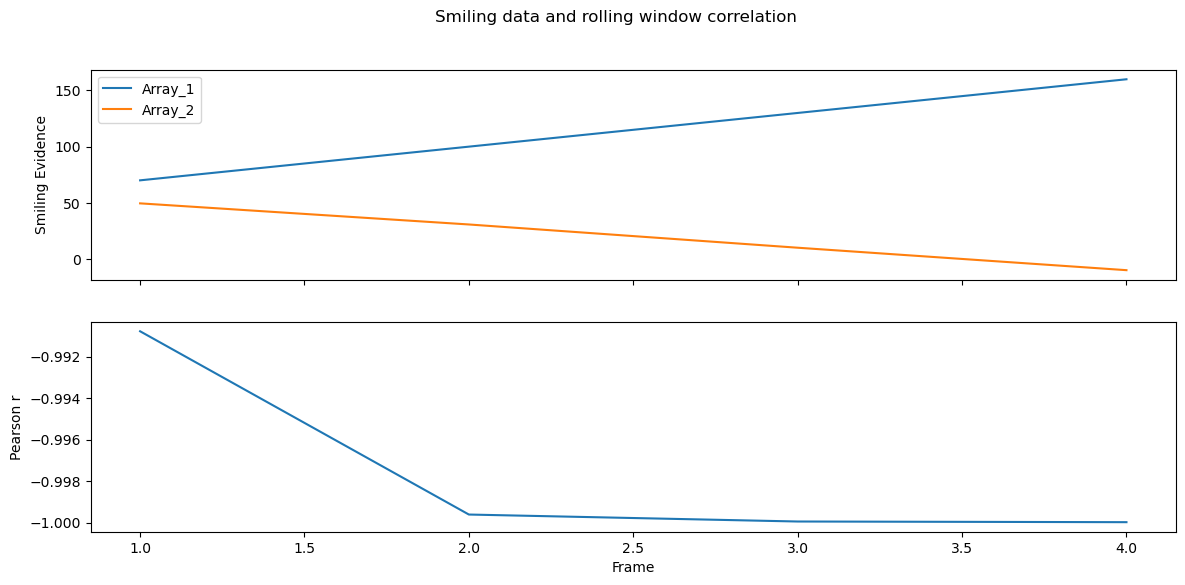

In [22]:
# Set window size to compute moving window synchrony.
r_window_size = 3
# Interpolate missing data.
data_interpolated = data.interpolate()
# Compute rolling window synchrony
rolling_r = data_interpolated['Array_1'].rolling(window=r_window_size, center=True).corr(data_interpolated['Array_2'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
data.rolling(window=3,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Smiling Evidence')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Smiling data and rolling window correlation")

In [ ]:
# Adaptation to our problem: Array_1 = array of lidar curve heights; Array_2 = array of simulation points corresponding to lidar curve heights.